In [ ]:
!pip install -q mlxtend
!gdown 1a47mER2sDPvDzZsgQhiFzhtv-uU5o_x2
!gdown 1AScqLzxGHsaMBExWHV3idPZWZTCL1nq5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1a47mER2sDPvDzZsgQhiFzhtv-uU5o_x2
To: /content/Market Basket Analysis 2.csv
100% 507k/507k [00:00<00:00, 21.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AScqLzxGHsaMBExWHV3idPZWZTCL1nq5
To: /content/Courses.xlsx
100% 12.8k/12.8k [00:00<00:00, 27.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datasets = []
df = pd.read_excel('Courses.xlsx')
transactions = []
for index, row in df.iterrows():
    transactions.append(list(df.columns[row == 1]))
datasets.append(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def read_data(filename):
    with open(filename, 'r') as file:
        transactions = [line.strip().split(',')[:-1] for line in file]
    return transactions
transactions = read_data('Market Basket Analysis 2.csv')
datasets.append(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **ECLAT**

## Simple version

In [ ]:
def eclat(prefix, items, frequent_itemsets, min_support, transactions_count):
    # Duyệt qua các items còn lại
    while items:
        # Trích xuất item và các transactions mà item có xuất hiện
        item, item_transactions = items.pop()
        itemset = prefix | {item}
        support = len(item_transactions) / transactions_count

        if support >= min_support:
            frequent_itemsets.append((itemset, support))

            suffix_items = []
            for next_item, next_transactions in items:
                intersection = item_transactions & next_transactions
                if intersection:
                    suffix_items.append((next_item, intersection))

            # Chạy đệ quy
            eclat(itemset, suffix_items, frequent_itemsets, min_support, transactions_count)

def processing_data_eclat(transactions, min_support):
    # Đếm tổng số giao dịch
    transactions_count = len(transactions)
    item_transactions = {}

    # Lưu lại index của các giao dịch mà item xuất hiện
    for index, transaction in enumerate(transactions):
        for item in transaction:
            if item in item_transactions:
                item_transactions[item].add(index)
            else:
                item_transactions[item] = {index}

    # Lọc các items có support >= minsup
    items = [(item, indices) for item, indices in item_transactions.items()
             if len(indices) / transactions_count >= min_support]

    return items, transactions_count

def optimized_eclat(items, transactions_count):
    # Khai phá các tập phổ biến
    frequent_itemsets = []
    eclat(set(), items, frequent_itemsets, min_support, transactions_count)

    return frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Run ECLAT và vẽ biểu đồ

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


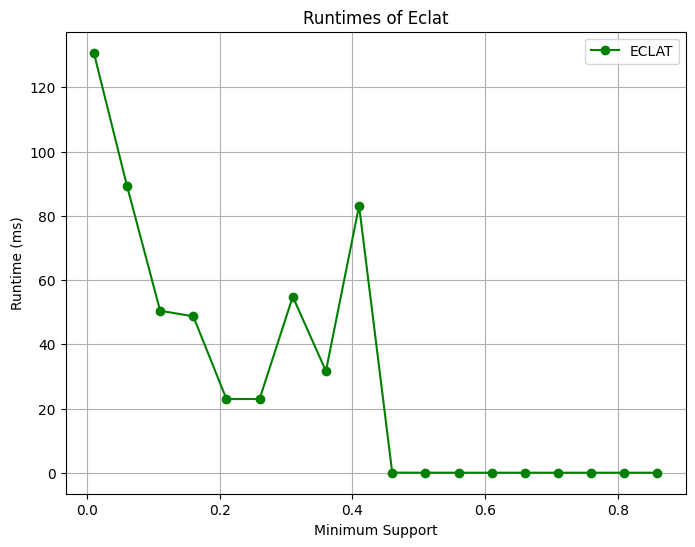

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate synthetic transaction data
np.random.seed(43)

# Vary the min_support values for comparison
min_support_values = np.arange(0.01, 0.9, 0.05)
min_combination = 1

eclat_runtimes = []

for min_support in min_support_values:
    eclat_items, transactions_count = processing_data_eclat(transactions, min_support)
    start_time = time.time()
    eclat_frequent_itemsets = optimized_eclat(eclat_items, transactions_count)
    eclat_time = time.time() - start_time
    eclat_runtimes.append(eclat_time * 1000)

# Plotting the runtimes
plt.figure(figsize=(8, 6))
plt.plot(min_support_values, eclat_runtimes, marker='o', label='ECLAT', color='g')

plt.title('Runtimes of Eclat')
plt.xlabel('Minimum Support')
plt.ylabel('Runtime (ms)')
plt.legend()
plt.grid(True)
plt.savefig('eclat.pdf', bbox_inches='tight')
# plt.show()

# **COMPARE RUNTIME**

Cố định 1 seed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


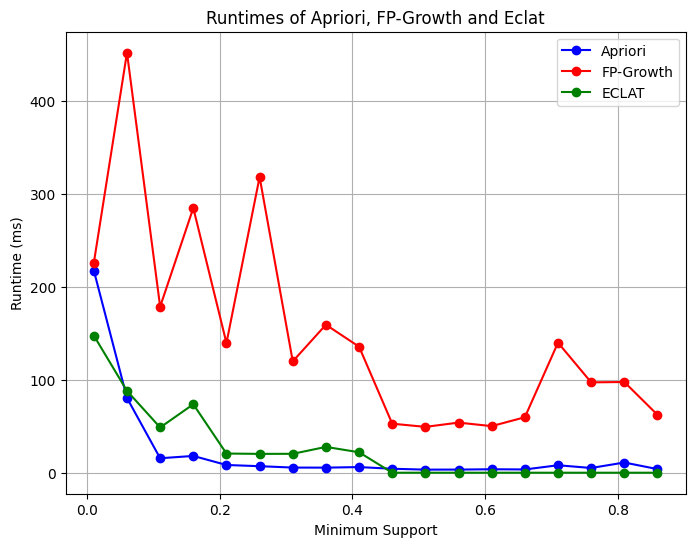

In [ ]:
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import pandas as pd

# Generate synthetic transaction data
np.random.seed(42)

# Preprocessing data for Apriori and FP-Growth
new_trans = transactions.copy()
te = TransactionEncoder()
te_ary = te.fit_transform(new_trans)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Vary the min_support values for comparison
min_support_values = np.arange(0.01, 0.9, 0.05)
min_combination = 1

apriori_runtimes = []
fpgrowth_runtimes = []
eclat_runtimes = []

for min_support in min_support_values:
    eclat_items, transactions_count = processing_data_eclat(transactions, min_support)

    # Measure runtime for Apriori
    start_time = time.time()
    apriori_frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    apriori_time = time.time() - start_time
    apriori_runtimes.append(apriori_time * 1000)
    # print(f'apriori: {len(apriori_frequent_itemsets)}')

    # Measure runtime for FP-Growth
    start_time = time.time()
    fpgrowth_frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    fpgrowth_time = time.time() - start_time
    fpgrowth_runtimes.append(fpgrowth_time * 1000)
    # print(f'fpgrowth: {len(fpgrowth_frequent_itemsets)}')

    start_time = time.time()
    eclat_frequent_itemsets = optimized_eclat(eclat_items, transactions_count)
    eclat_time = time.time() - start_time
    eclat_runtimes.append(eclat_time * 1000)
    # print(f'eclat: {len(eclat_frequent_itemsets)}')

# Plotting the runtimes
plt.figure(figsize=(8, 6))
plt.plot(min_support_values, apriori_runtimes, marker='o', label='Apriori', color='b')
plt.plot(min_support_values, fpgrowth_runtimes, marker='o', label='FP-Growth', color='r')
plt.plot(min_support_values, eclat_runtimes, marker='o', label='ECLAT', color='g')

plt.title('Runtimes of Apriori, FP-Growth and Eclat')
plt.xlabel('Minimum Support')
plt.ylabel('Runtime (ms)')
plt.legend()
plt.grid(True)
plt.savefig('run_1_seed.pdf', bbox_inches='tight')
# plt.show()

Với nhiều seed khác nhau

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


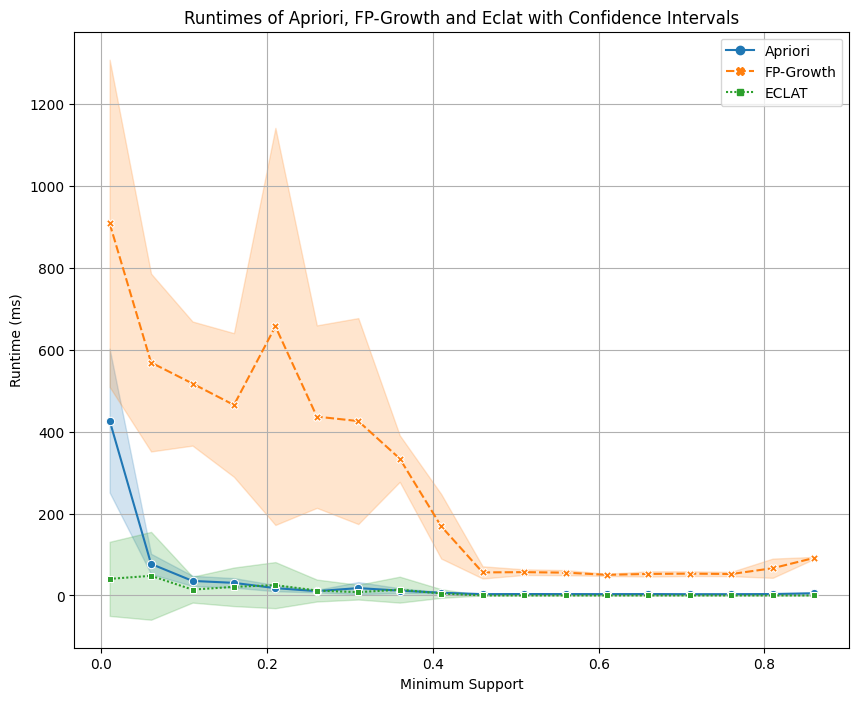

In [ ]:
# Preprocessing data for Apriori and FP-Growth
new_trans = transactions.copy()
te = TransactionEncoder()
te_ary = te.fit_transform(new_trans)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Vary the min_support values for comparison
min_support_values = np.arange(0.01, 0.9, 0.05)

# Number of seeds for variance estimation
num_seeds = 5

# Initialize the runtimes list for each algorithm
runtimes = {
    'algorithm': [],
    'min_support': [],
    'runtime': [],
    'seed': []
}

# Run the algorithms multiple times with different seeds to measure variance
for min_support in min_support_values:
    eclat_items, transactions_count = processing_data_eclat(transactions, min_support)
    for seed in range(num_seeds):
        np.random.seed(seed)

        # Measure runtime for Apriori
        start_time = time.time()
        apriori_frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
        apriori_time = time.time() - start_time
        runtimes['algorithm'].append('Apriori')
        runtimes['min_support'].append(min_support)
        runtimes['runtime'].append(apriori_time * 1000)
        runtimes['seed'].append(seed)

        # Measure runtime for FP-Growth
        start_time = time.time()
        fpgrowth_frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
        fpgrowth_time = time.time() - start_time
        runtimes['algorithm'].append('FP-Growth')
        runtimes['min_support'].append(min_support)
        runtimes['runtime'].append(fpgrowth_time * 1000)
        runtimes['seed'].append(seed)

        # Measure runtime for ECLAT
        start_time = time.time()
        eclat_frequent_itemsets = optimized_eclat(eclat_items, transactions_count)
        eclat_time = time.time() - start_time
        runtimes['algorithm'].append('ECLAT')
        runtimes['min_support'].append(min_support)
        runtimes['runtime'].append(eclat_time * 1000)
        runtimes['seed'].append(seed)

# Convert the runtimes to a DataFrame
runtimes_df = pd.DataFrame(runtimes)

# Create a line plot with confidence intervals using seaborn
plt.figure(figsize=(10, 8))
sns.lineplot(data=runtimes_df, x='min_support', y='runtime', hue='algorithm', style='algorithm', markers=True, errorbar='sd', err_style='band')

plt.title('Runtimes of Apriori, FP-Growth and Eclat with Confidence Intervals')
plt.xlabel('Minimum Support')
plt.ylabel('Runtime (ms)')
plt.legend()
plt.grid(True)
plt.savefig('multiseed.pdf', bbox_inches='tight')
# plt.show()

Với nhiều seed khác nhau trên 2 bộ dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


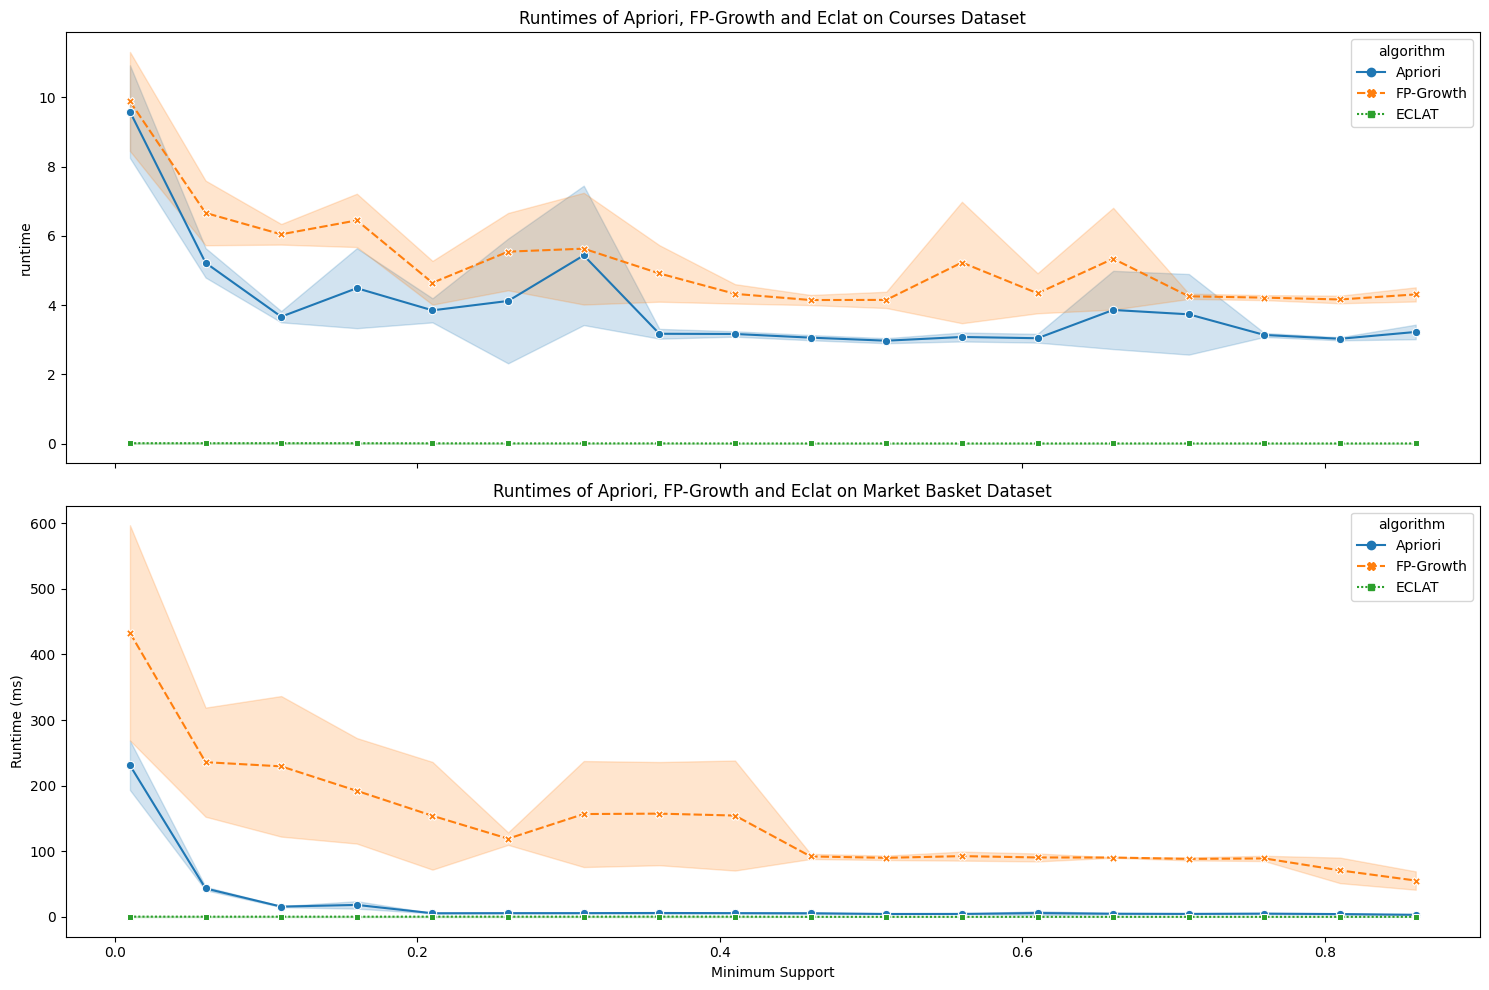

In [ ]:
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import pandas as pd

# Preprocessing data for Apriori and FP-Growth for both datasets
datasets_copy = datasets.copy()
te = TransactionEncoder()
df1 = pd.DataFrame(te.fit_transform(datasets_copy[0]), columns=te.columns_)
df2 = pd.DataFrame(te.fit_transform(datasets_copy[1]), columns=te.columns_)

# Vary the min_support values for comparison
min_support_values = np.arange(0.01, 0.9, 0.05)

# Number of seeds for variance estimation
num_seeds = 5

# Initialize the runtimes list for each algorithm
runtimes = {
    'algorithm': [],
    'min_support': [],
    'runtime': [],
    'seed': [],
    'dataset': []
}

# Define a function to simulate the runtime measurements for each dataset
def simulate_runtimes(df, dataset_name, transactions):
    for min_support in min_support_values:
        eclat_items, transactions_count = processing_data_eclat(transactions, min_support)
        for seed in range(num_seeds):
            np.random.seed(seed)

            # Measure runtime for Apriori
            start_time = time.time()
            apriori_frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
            apriori_time = time.time() - start_time
            runtimes['algorithm'].append('Apriori')
            runtimes['min_support'].append(min_support)
            runtimes['runtime'].append(apriori_time * 1000)
            runtimes['seed'].append(seed)
            runtimes['dataset'].append(dataset_name)
            # print(len(apriori_frequent_itemsets))

            # Measure runtime for FP-Growth
            start_time = time.time()
            fpgrowth_frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
            fpgrowth_time = time.time() - start_time
            runtimes['algorithm'].append('FP-Growth')
            runtimes['min_support'].append(min_support)
            runtimes['runtime'].append(fpgrowth_time * 1000)
            runtimes['seed'].append(seed)
            runtimes['dataset'].append(dataset_name)
            # print(len(fpgrowth_frequent_itemsets))

            # Measure runtime for ECLAT
            start_time = time.time()
            eclat_frequent_itemsets = optimized_eclat(eclat_items, transactions_count)
            eclat_time = time.time() - start_time
            runtimes['algorithm'].append('ECLAT')
            runtimes['min_support'].append(min_support)
            runtimes['runtime'].append(eclat_time * 1000)
            runtimes['seed'].append(seed)
            runtimes['dataset'].append(dataset_name)
            # print(len(eclat_frequent_itemsets))

# Simulate runtimes for both datasets
simulate_runtimes(df1, 'Courses Dataset', datasets[0])
simulate_runtimes(df2, 'Market Basket Dataset', datasets[1])

# Convert the runtimes to a DataFrame
runtimes_df = pd.DataFrame(runtimes)

# Plotting the runtimes with error bands using seaborn
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Courses Dataset
sns.lineplot(ax=axs[0], data=runtimes_df[runtimes_df['dataset'] == 'Courses Dataset'],
             x='min_support', y='runtime', hue='algorithm', style='algorithm',
             markers=True, errorbar='sd', err_style='band')
axs[0].set_title('Runtimes of Apriori, FP-Growth and Eclat on Courses Dataset')

# Market Basket Dataset
sns.lineplot(ax=axs[1], data=runtimes_df[runtimes_df['dataset'] == 'Market Basket Dataset'],
             x='min_support', y='runtime', hue='algorithm', style='algorithm',
             markers=True, errorbar='sd', err_style='band')
axs[1].set_title('Runtimes of Apriori, FP-Growth and Eclat on Market Basket Dataset')

plt.xlabel('Minimum Support')
plt.ylabel('Runtime (ms)')
plt.tight_layout()
plt.savefig('2datasets.pdf', bbox_inches='tight')
# plt.show()

# **COMPARE MEMORY**

In [ ]:
!pip install -q memory_profiler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


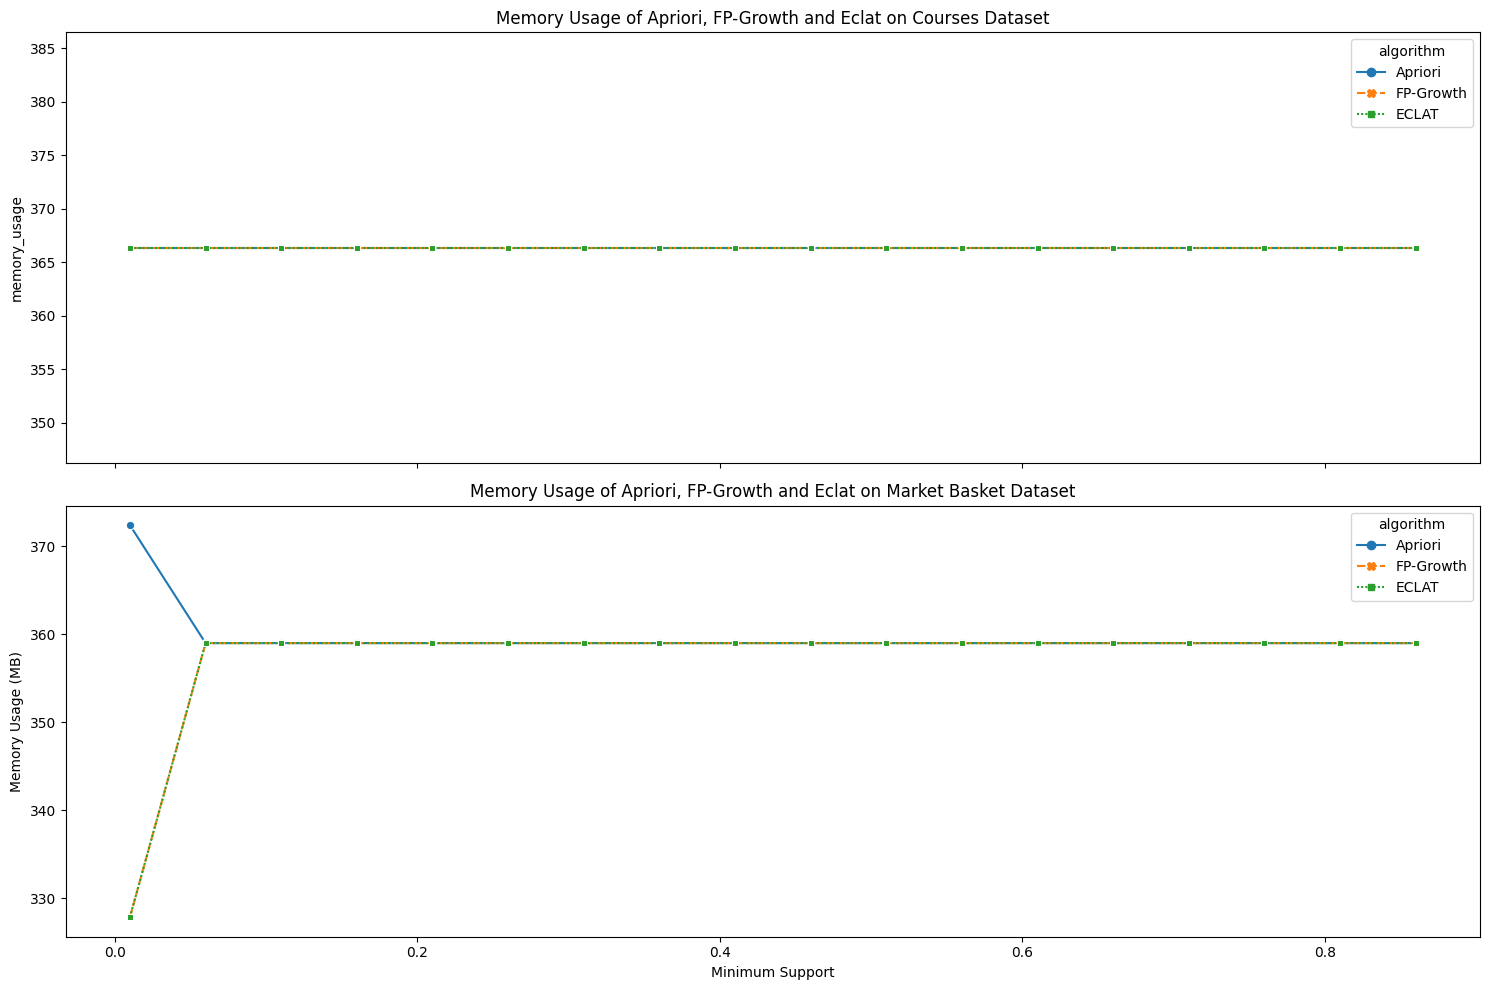

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from memory_profiler import memory_usage

# Define a function to measure memory usage for each algorithm
def measure_memory(df, min_support, algorithm, eclat_items, transactions_count):
    if algorithm == 'Apriori':
        mem_usage = memory_usage((apriori, (df,), {'min_support': min_support, 'use_colnames': True}), max_usage=True)
    elif algorithm == 'FP-Growth':
        mem_usage = memory_usage((fpgrowth, (df,), {'min_support': min_support, 'use_colnames': True}), max_usage=True)
    elif algorithm == 'ECLAT':
        mem_usage = memory_usage((optimized_eclat, (eclat_items, transactions_count)), max_usage=True)
    else:
        mem_usage = [0]
    return max([mem_usage])

# Simulate the memory usage measurement for each dataset
def simulate_memory_usage(df, dataset_name, transactions):
    for min_support in min_support_values:
        eclat_items, transactions_count = processing_data_eclat(transactions, min_support)
        for algorithm in ['Apriori', 'FP-Growth', 'ECLAT']:
            # Since we can't run the actual memory usage measurement here,
            # let's assume we run the measure_memory function and get the result.
            mem_usage = measure_memory(df, min_support, algorithm, eclat_items, transactions_count)
            memory_usages['algorithm'].append(algorithm)
            memory_usages['min_support'].append(min_support)
            memory_usages['memory_usage'].append(mem_usage)
            memory_usages['dataset'].append(dataset_name)

# Initialize the memory usages list for each algorithm
memory_usages = {
    'algorithm': [],
    'min_support': [],
    'memory_usage': [],
    'dataset': []
}

# Here you would call the simulate_memory_usage function for both datasets
simulate_memory_usage(df1, 'Courses Dataset', datasets[0])
simulate_memory_usage(df2, 'Market Basket Dataset', datasets[1])

# Convert the memory usages to a DataFrame
memory_usages_df = pd.DataFrame(memory_usages)

# Plotting the memory usages with error bands using seaborn
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Courses Dataset
sns.lineplot(ax=axs[0], data=memory_usages_df[memory_usages_df['dataset'] == 'Courses Dataset'],
             x='min_support', y='memory_usage', hue='algorithm', style='algorithm',
             markers=True, errorbar='sd', err_style='band')
axs[0].set_title('Memory Usage of Apriori, FP-Growth and Eclat on Courses Dataset')

# Market Basket Dataset
sns.lineplot(ax=axs[1], data=memory_usages_df[memory_usages_df['dataset'] == 'Market Basket Dataset'],
             x='min_support', y='memory_usage', hue='algorithm', style='algorithm',
             markers=True, errorbar='sd', err_style='band')
axs[1].set_title('Memory Usage of Apriori, FP-Growth and Eclat on Market Basket Dataset')

plt.xlabel('Minimum Support')
plt.ylabel('Memory Usage (MB)')
plt.tight_layout()
plt.savefig('memory1.pdf', bbox_inches='tight')
# plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


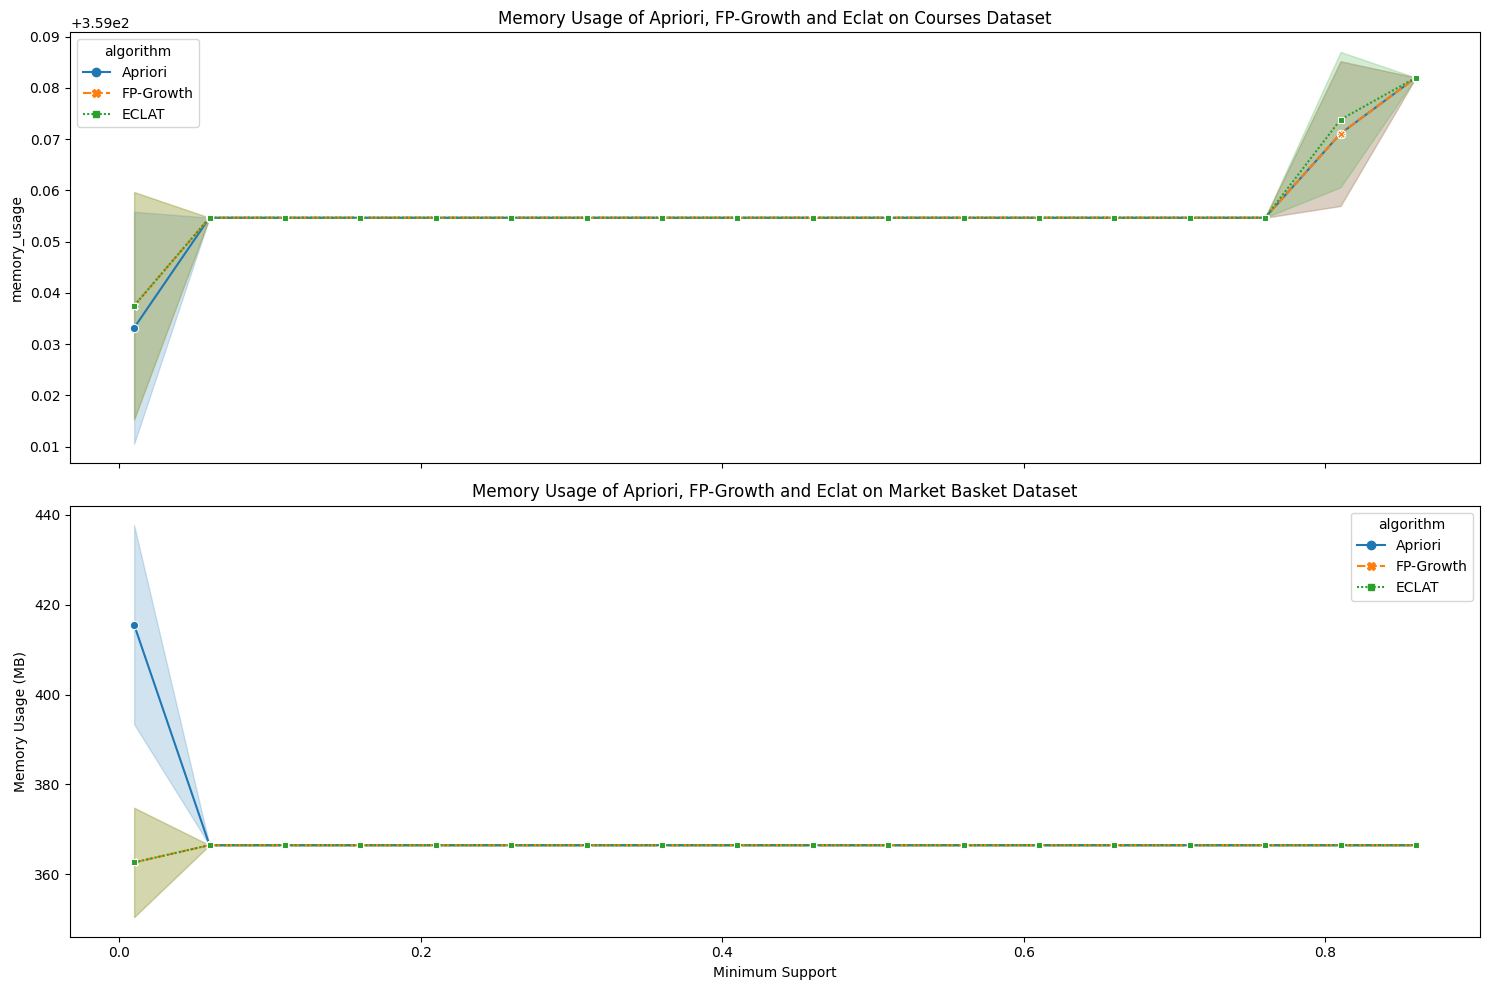

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from memory_profiler import memory_usage

# Define a function to measure memory usage for each algorithm
def measure_memory(func, *args, **kwargs):
    mem_usage = memory_usage((func, args, kwargs), max_usage=True)
    return max([mem_usage])

# Simulate the memory usage measurement for each dataset
def simulate_memory_usage(df, dataset_name, transactions, min_support_values, num_seeds):
    memory_usages = {'algorithm': [], 'min_support': [], 'memory_usage': [], 'seed': [], 'dataset': []}

    for min_support in min_support_values:
        eclat_items, transactions_count = processing_data_eclat(transactions, min_support)
        for seed in range(num_seeds):
            np.random.seed(seed)

            # Measure memory for Apriori
            mem_usage = measure_memory(apriori, df, min_support=min_support, use_colnames=True)
            memory_usages['algorithm'].append('Apriori')
            memory_usages['min_support'].append(min_support)
            memory_usages['memory_usage'].append(mem_usage)
            memory_usages['seed'].append(seed)
            memory_usages['dataset'].append(dataset_name)

            # Measure memory for FP-Growth
            mem_usage = measure_memory(fpgrowth, df, min_support=min_support, use_colnames=True)
            memory_usages['algorithm'].append('FP-Growth')
            memory_usages['min_support'].append(min_support)
            memory_usages['memory_usage'].append(mem_usage)
            memory_usages['seed'].append(seed)
            memory_usages['dataset'].append(dataset_name)

            # Measure memory for ECLAT
            mem_usage = measure_memory(optimized_eclat, eclat_items, transactions_count)
            memory_usages['algorithm'].append('ECLAT')
            memory_usages['min_support'].append(min_support)
            memory_usages['memory_usage'].append(mem_usage)
            memory_usages['seed'].append(seed)
            memory_usages['dataset'].append(dataset_name)

    return memory_usages

# Parameters for the simulation
min_support_values = np.arange(0.01, 0.9, 0.05)
num_seeds = 10

# Simulate memory usage for both datasets
memory_usages_dataset1 = simulate_memory_usage(df1, 'Courses Dataset', datasets[0], min_support_values, num_seeds)
memory_usages_dataset2 = simulate_memory_usage(df2, 'Market Basket Dataset', datasets[1], min_support_values, num_seeds)

# Combine the results and convert to a DataFrame
# memory_usages_combined = {**memory_usages_dataset1, **memory_usages_dataset2}

memory_usages_df1 = pd.DataFrame(memory_usages_dataset1)
memory_usages_df2 = pd.DataFrame(memory_usages_dataset2)

# Plotting the memory usages with error bands using seaborn
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Courses Dataset
sns.lineplot(ax=axs[0], data=memory_usages_df1,
             x='min_support', y='memory_usage', hue='algorithm', style='algorithm',
             markers=True, errorbar='sd', err_style='band')
axs[0].set_title('Memory Usage of Apriori, FP-Growth and Eclat on Courses Dataset')

# Market Basket Dataset
sns.lineplot(ax=axs[1], data=memory_usages_df2,
             x='min_support', y='memory_usage', hue='algorithm', style='algorithm',
             markers=True, errorbar='sd', err_style='band')
axs[1].set_title('Memory Usage of Apriori, FP-Growth and Eclat on Market Basket Dataset')

plt.xlabel('Minimum Support')
plt.ylabel('Memory Usage (MB)')
plt.tight_layout()
plt.show()

In [ ]:
from itertools import combinations
def mine_association_rules(FreqItems):
    Rules = []
    cnt = 0

    for items, support in FreqItems:
        if len(items) > 1:
            all_perms = list(itertools.permutations(items, len(items)))
            for antecedent in all_perms:
                antecedent = set(antecedent)
                consequent = set(items) - antecedent
                confidence = support / FreqItems[antecedent]
                rule = (antecedent, consequent, confidence)
                Rules.append(rule)

    return Rules

def print_Rules(Rules):
    for a, b, supp in sorted(Rules):
        print(f"{', '.join(map(str, a))} ==> {', '.join(map(str, b))} support: {len(supp)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
eclat_items, transactions_count = processing_data_eclat(transactions, 0.01)
eclat_frequent_itemsets = optimized_eclat(eclat_items, transactions_count)
print(eclat_frequent_itemsets)
# Tìm và in ra các luật kết hợp
Rules = mine_association_rules(eclat_frequent_itemsets)
print('Association Rules:')
print_Rules(Rules)

[]
Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
